In [20]:
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.lines as mlines

import numpy as np

df = pd.read_csv ('1961_2013.csv', index_col = 'Year')


# Index = year > usare loc per selezionare anni 1980 e 2013

In [21]:
#TABELLA CON SOLO VALORI 1980 E 2013

df_1980 = df.loc[1980].rename(columns = {'Neu5Gc':'Neu1980'})
df_2013 = df.loc[2013].rename(columns = {'Neu5Gc':'Neu2013'})
df_1980_2013 = df_1980.merge(df_2013, how='left')
df_1980_2013.head(3)

df_1980_2013.head(10)
df_1980_2013.to_csv("1980+2013.csv", index=False, encoding='utf8')

In [22]:
# SLOPE GRAPH DAVIDE

df2 = df_1980_2013[df_1980_2013["Country"].isin(["China", "India", "Japan", "Brazil", "Italy", "Denmark", "France", "United States of America"])]
df2

,Country,Neu1980,Neu2013
22,Brazil,19706.24,34761.23
33,China,1782.03,10703.50
48,Denmark,29087.18,37428.58
61,France,43510.28,33597.55
78,India,4626.65,7444.40
84,Italy,33454.20,29714.76
86,Japan,10352.65,13340.78
173,United States of America,46105.34,38961.31


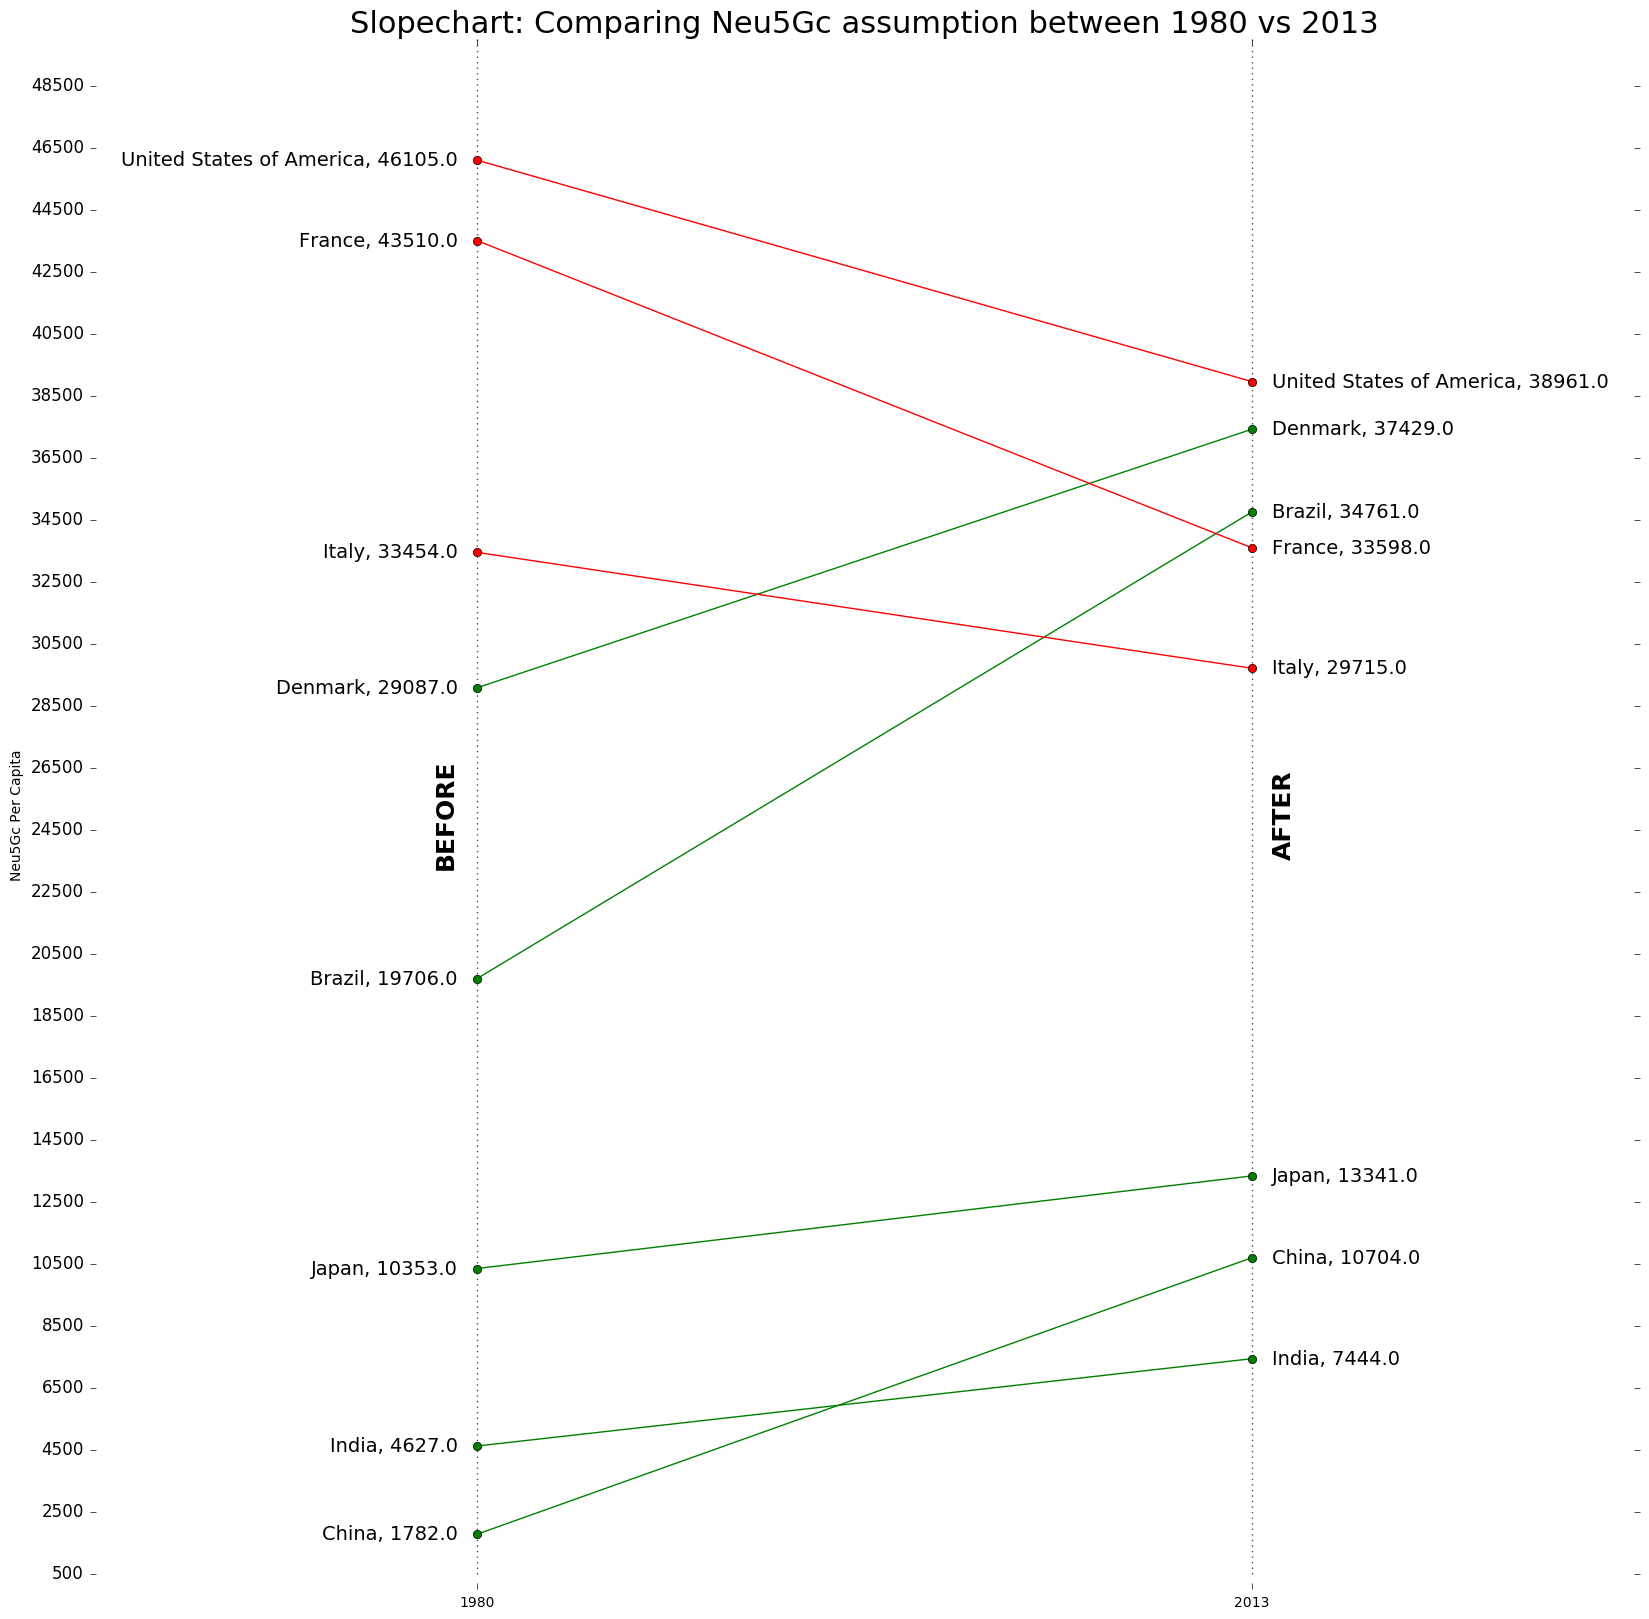

In [9]:
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df2.Country, df2['Neu1980'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df2.Country, df2['Neu2013'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df2['Neu1980'], df2['Neu2013'])]

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,20), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=50000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=50000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df2['Neu1980'], x=np.repeat(1, df2.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df2['Neu2013'], x=np.repeat(3, df2.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(df2['Neu1980'], df2['Neu2013'], df2['Country']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 25000, 'BEFORE', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 25000, 'AFTER', horizontalalignment='left', verticalalignment='center', rotation='vertical', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing Neu5Gc assumption between 1980 vs 2013", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,50000), ylabel='Neu5Gc Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1980", "2013"])
plt.yticks(np.arange(500, 50000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

plt.show ()
fig.savefig('slope_Davide.eps')

In [10]:
# SLOPE GRAPH VALORI 5 MAX E MIN (tot 10)

df3 = df_1980_2013[df_1980_2013["Country"].isin(['New Zealand', 'Uruguay', 'Ireland', 'Bermuda', 'United Arab Emirates', 'Albania', 'China, Hong Kong SAR', 'Brazil', 'Maldives', 'French Polynesia'])]
df3.shape

(10, 3)

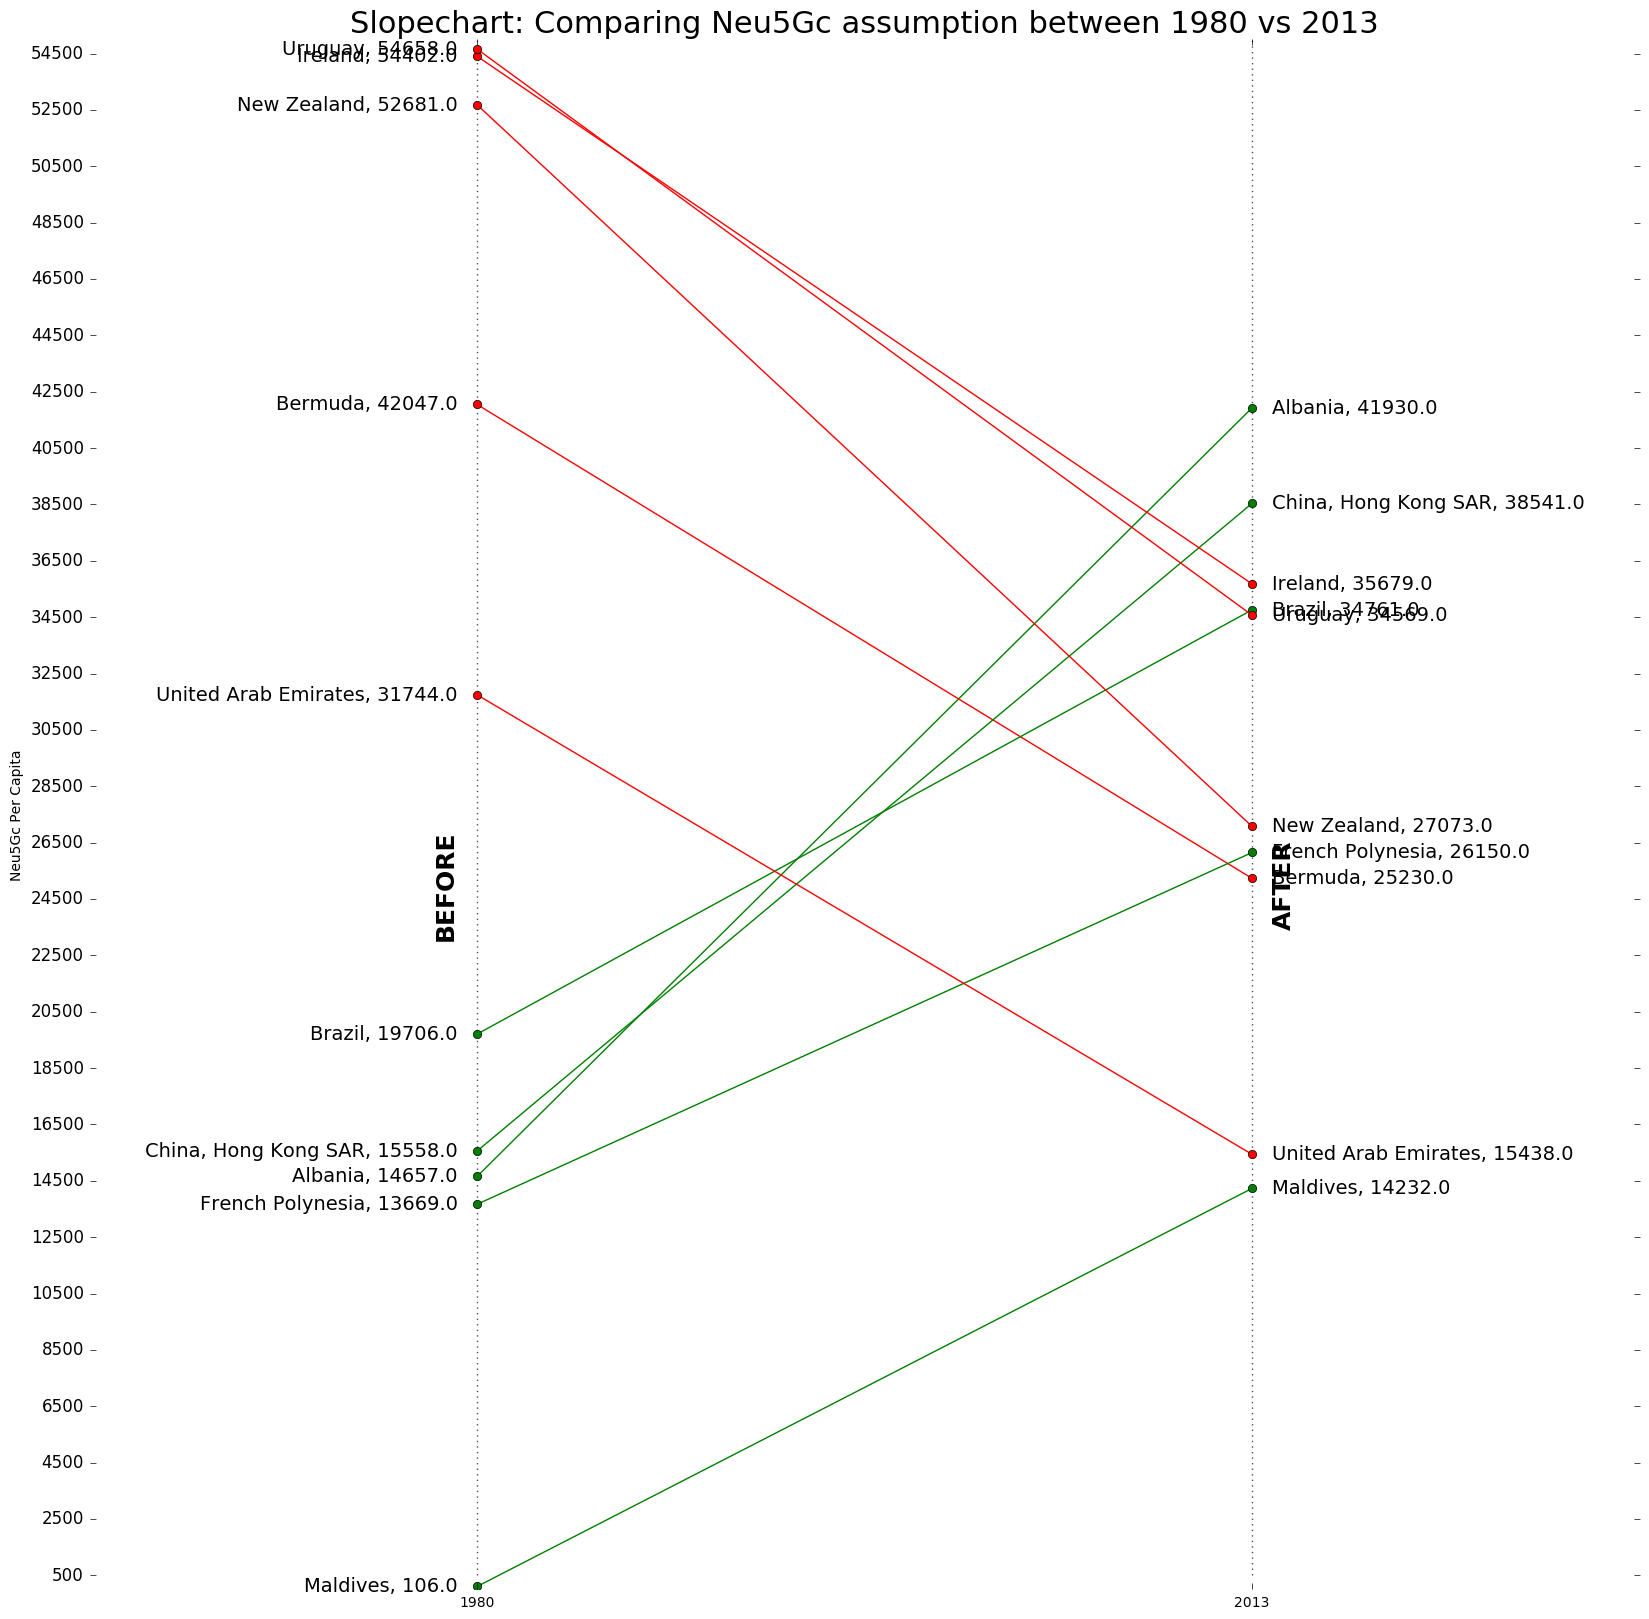

In [11]:
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df3.Country, df3['Neu1980'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df3.Country, df3['Neu2013'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df3['Neu1980'], df3['Neu2013'])]

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,20), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=55000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=55000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df3['Neu1980'], x=np.repeat(1, df3.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df3['Neu2013'], x=np.repeat(3, df3.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(df3['Neu1980'], df3['Neu2013'], df3['Country']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 25000, 'BEFORE', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 25000, 'AFTER', horizontalalignment='left', verticalalignment='center', rotation='vertical', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing Neu5Gc assumption between 1980 vs 2013", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,55000), ylabel='Neu5Gc Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1980", "2013"])
plt.yticks(np.arange(500, 55000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

plt.show ()
fig.savefig('slope_10minmax.eps')



In [23]:
# SLOPE GRAPH 10 MAX E MIN (tot 20)

df4= df_1980_2013[df_1980_2013["Country"].isin(['New Zealand', 'Uruguay', 'Ireland', 'Bermuda', 'United Arab Emirates',
                                                 'Argentina', 'Iceland', 'Poland', 'Namibia', 'Hungary',
                                                 'Albania', 'China, Hong Kong SAR', 'Brazil', 'Maldives', 'French Polynesia',
                                                 'Portugal', 'Israel', 'Republic of Korea', 'Cabo Verde', 'China'])]
df4.shape


(20, 3)

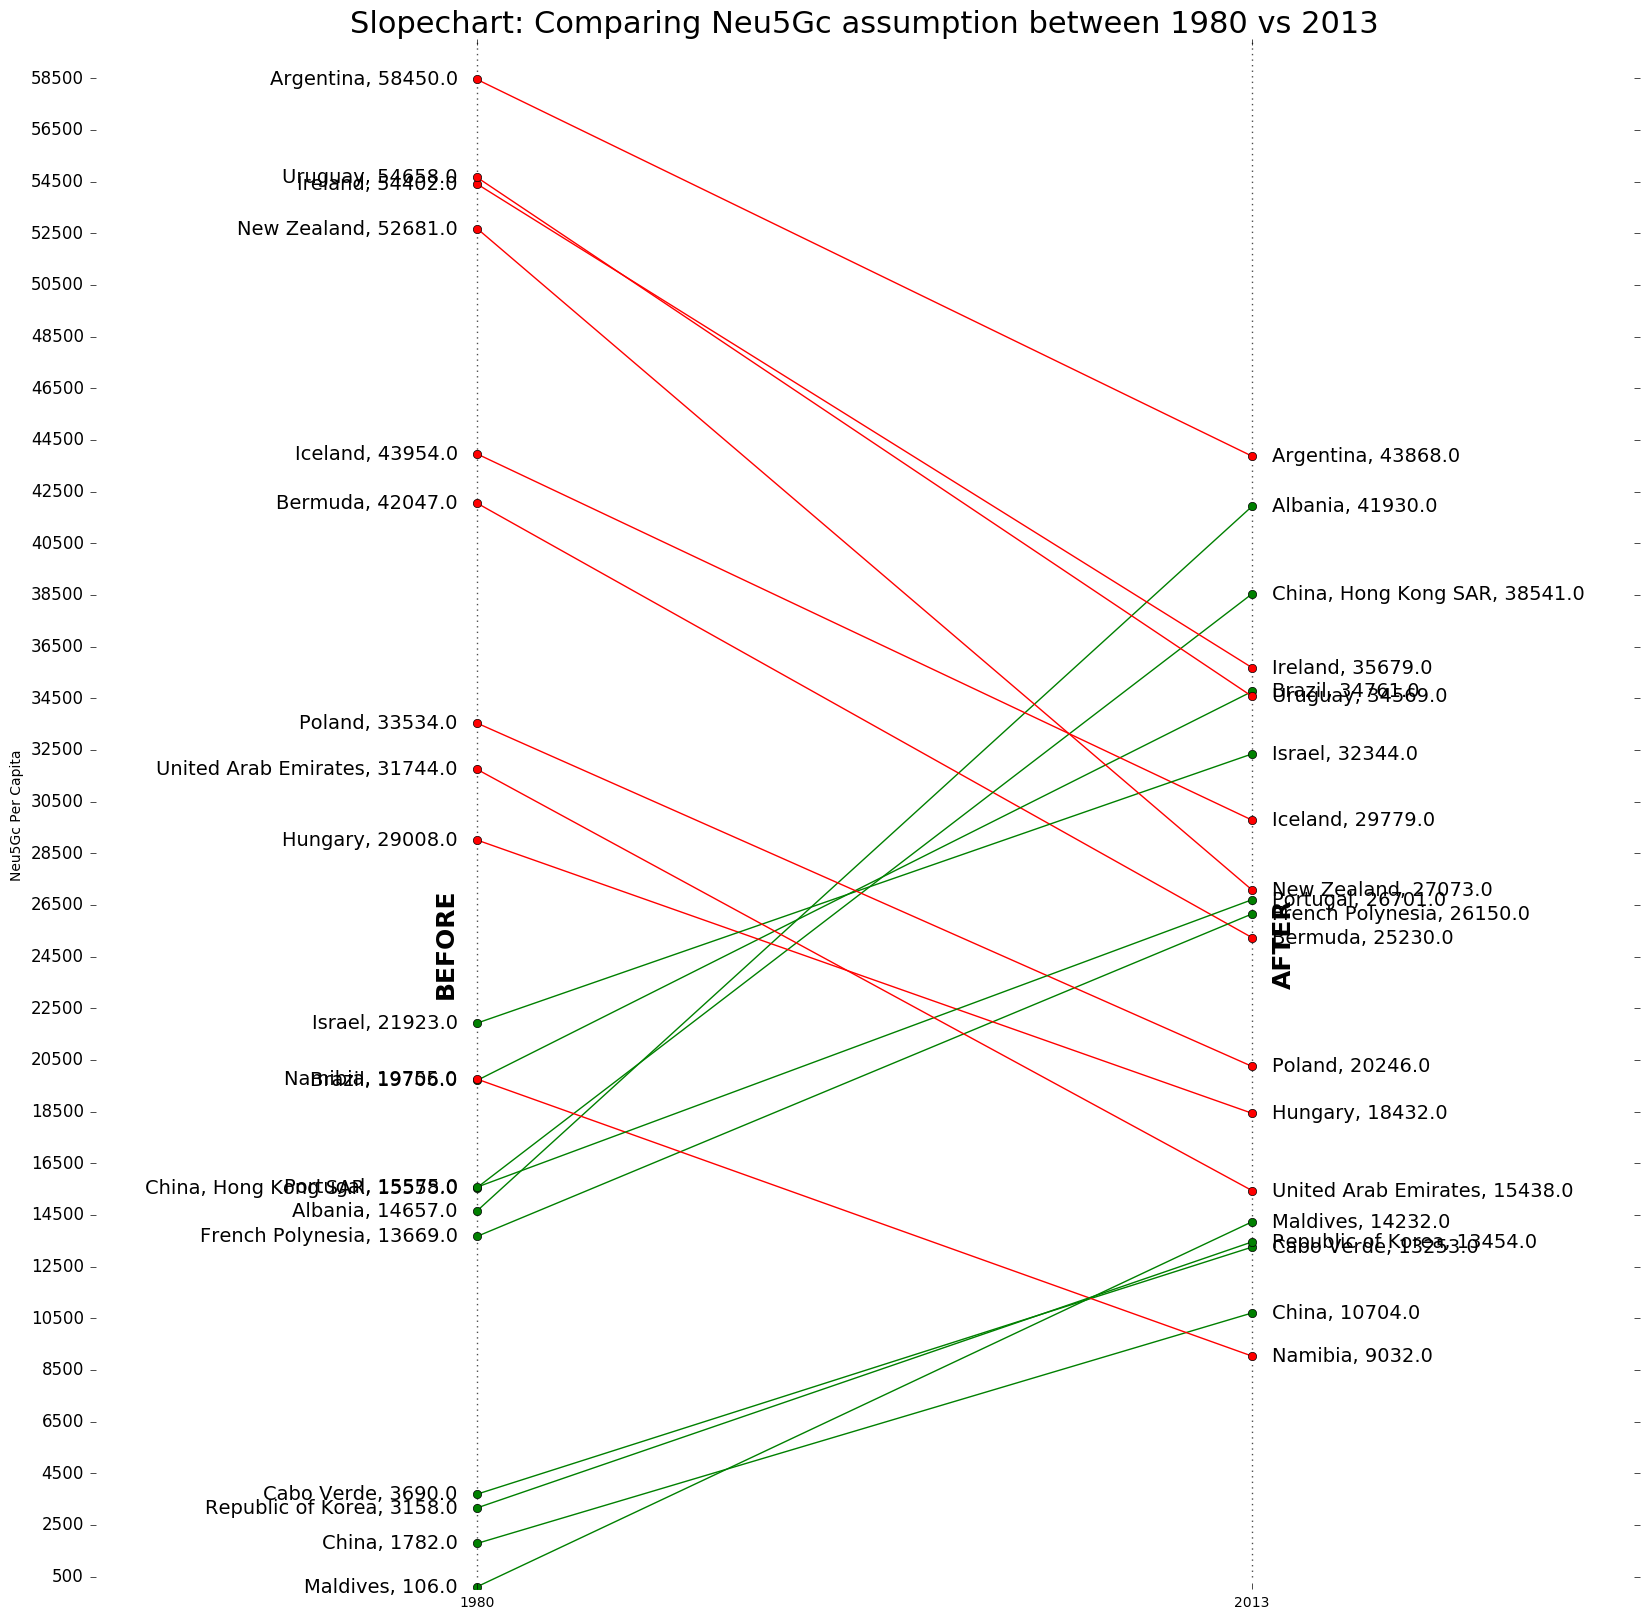

In [25]:
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df4.Country, df4['Neu1980'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df4.Country, df4['Neu2013'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df4['Neu1980'], df4['Neu2013'])]

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,20), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=60000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=60000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df4['Neu1980'], x=np.repeat(1, df4.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df4['Neu2013'], x=np.repeat(3, df4.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(df4['Neu1980'], df4['Neu2013'], df4['Country']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 25000, 'BEFORE', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 25000, 'AFTER', horizontalalignment='left', verticalalignment='center', rotation='vertical', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing Neu5Gc assumption between 1980 vs 2013", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,60000), ylabel='Neu5Gc Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1980", "2013"])
plt.yticks(np.arange(500, 60000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

plt.show ()
fig.savefig('slope_20minmax.eps')



In [14]:
# DIFFERENZA 2013 - 2008 per vedere nazioni piu interessanti

df_1980_2013['difference'] = (df_1980_2013.Neu2013 - df_1980_2013.Neu1980)

df_dif = df_1980_2013.drop(['Neu1980', 'Neu2013'], axis=1)
df_dif.head(3)

#df_dif.to_csv("2013-1980.csv", index=False, encoding='utf8')

,Country,difference
0,Afghanistan,-1499.66
1,Albania,27272.97
2,Algeria,6918.14


In [15]:
df_large = df_dif.nlargest(30, ['difference'])
df_large 

df_large.to_csv("30_largest.csv", index=False, encoding='utf8')

In [18]:
df_small = df_dif.nsmallest(30, ['difference'])
df_small

df_small.to_csv("30_small.csv", index=False, encoding='utf8')